<a href="https://colab.research.google.com/github/lazarogibert/Repositorio/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boston Housing Prices: El dataset contiene 506 observaciones de 14 
variables y precios de venta de propiedades en la ciudad de Boston. El 
objetivo es conocer la influencia de cada variable y elaborar un modelo que
prediga precios de venta.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [27]:
data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [28]:
data.shape

data['RAD']=data['RAD'].astype(float)
data['TAX']=data['TAX'].astype(float)
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [29]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [30]:
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5.0,279.0,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24.0,666.0,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,NaN,22.4


In [31]:
#Lleno los campos vacios con la mediana
data.fillna(data.median(), inplace=True)


In [32]:
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


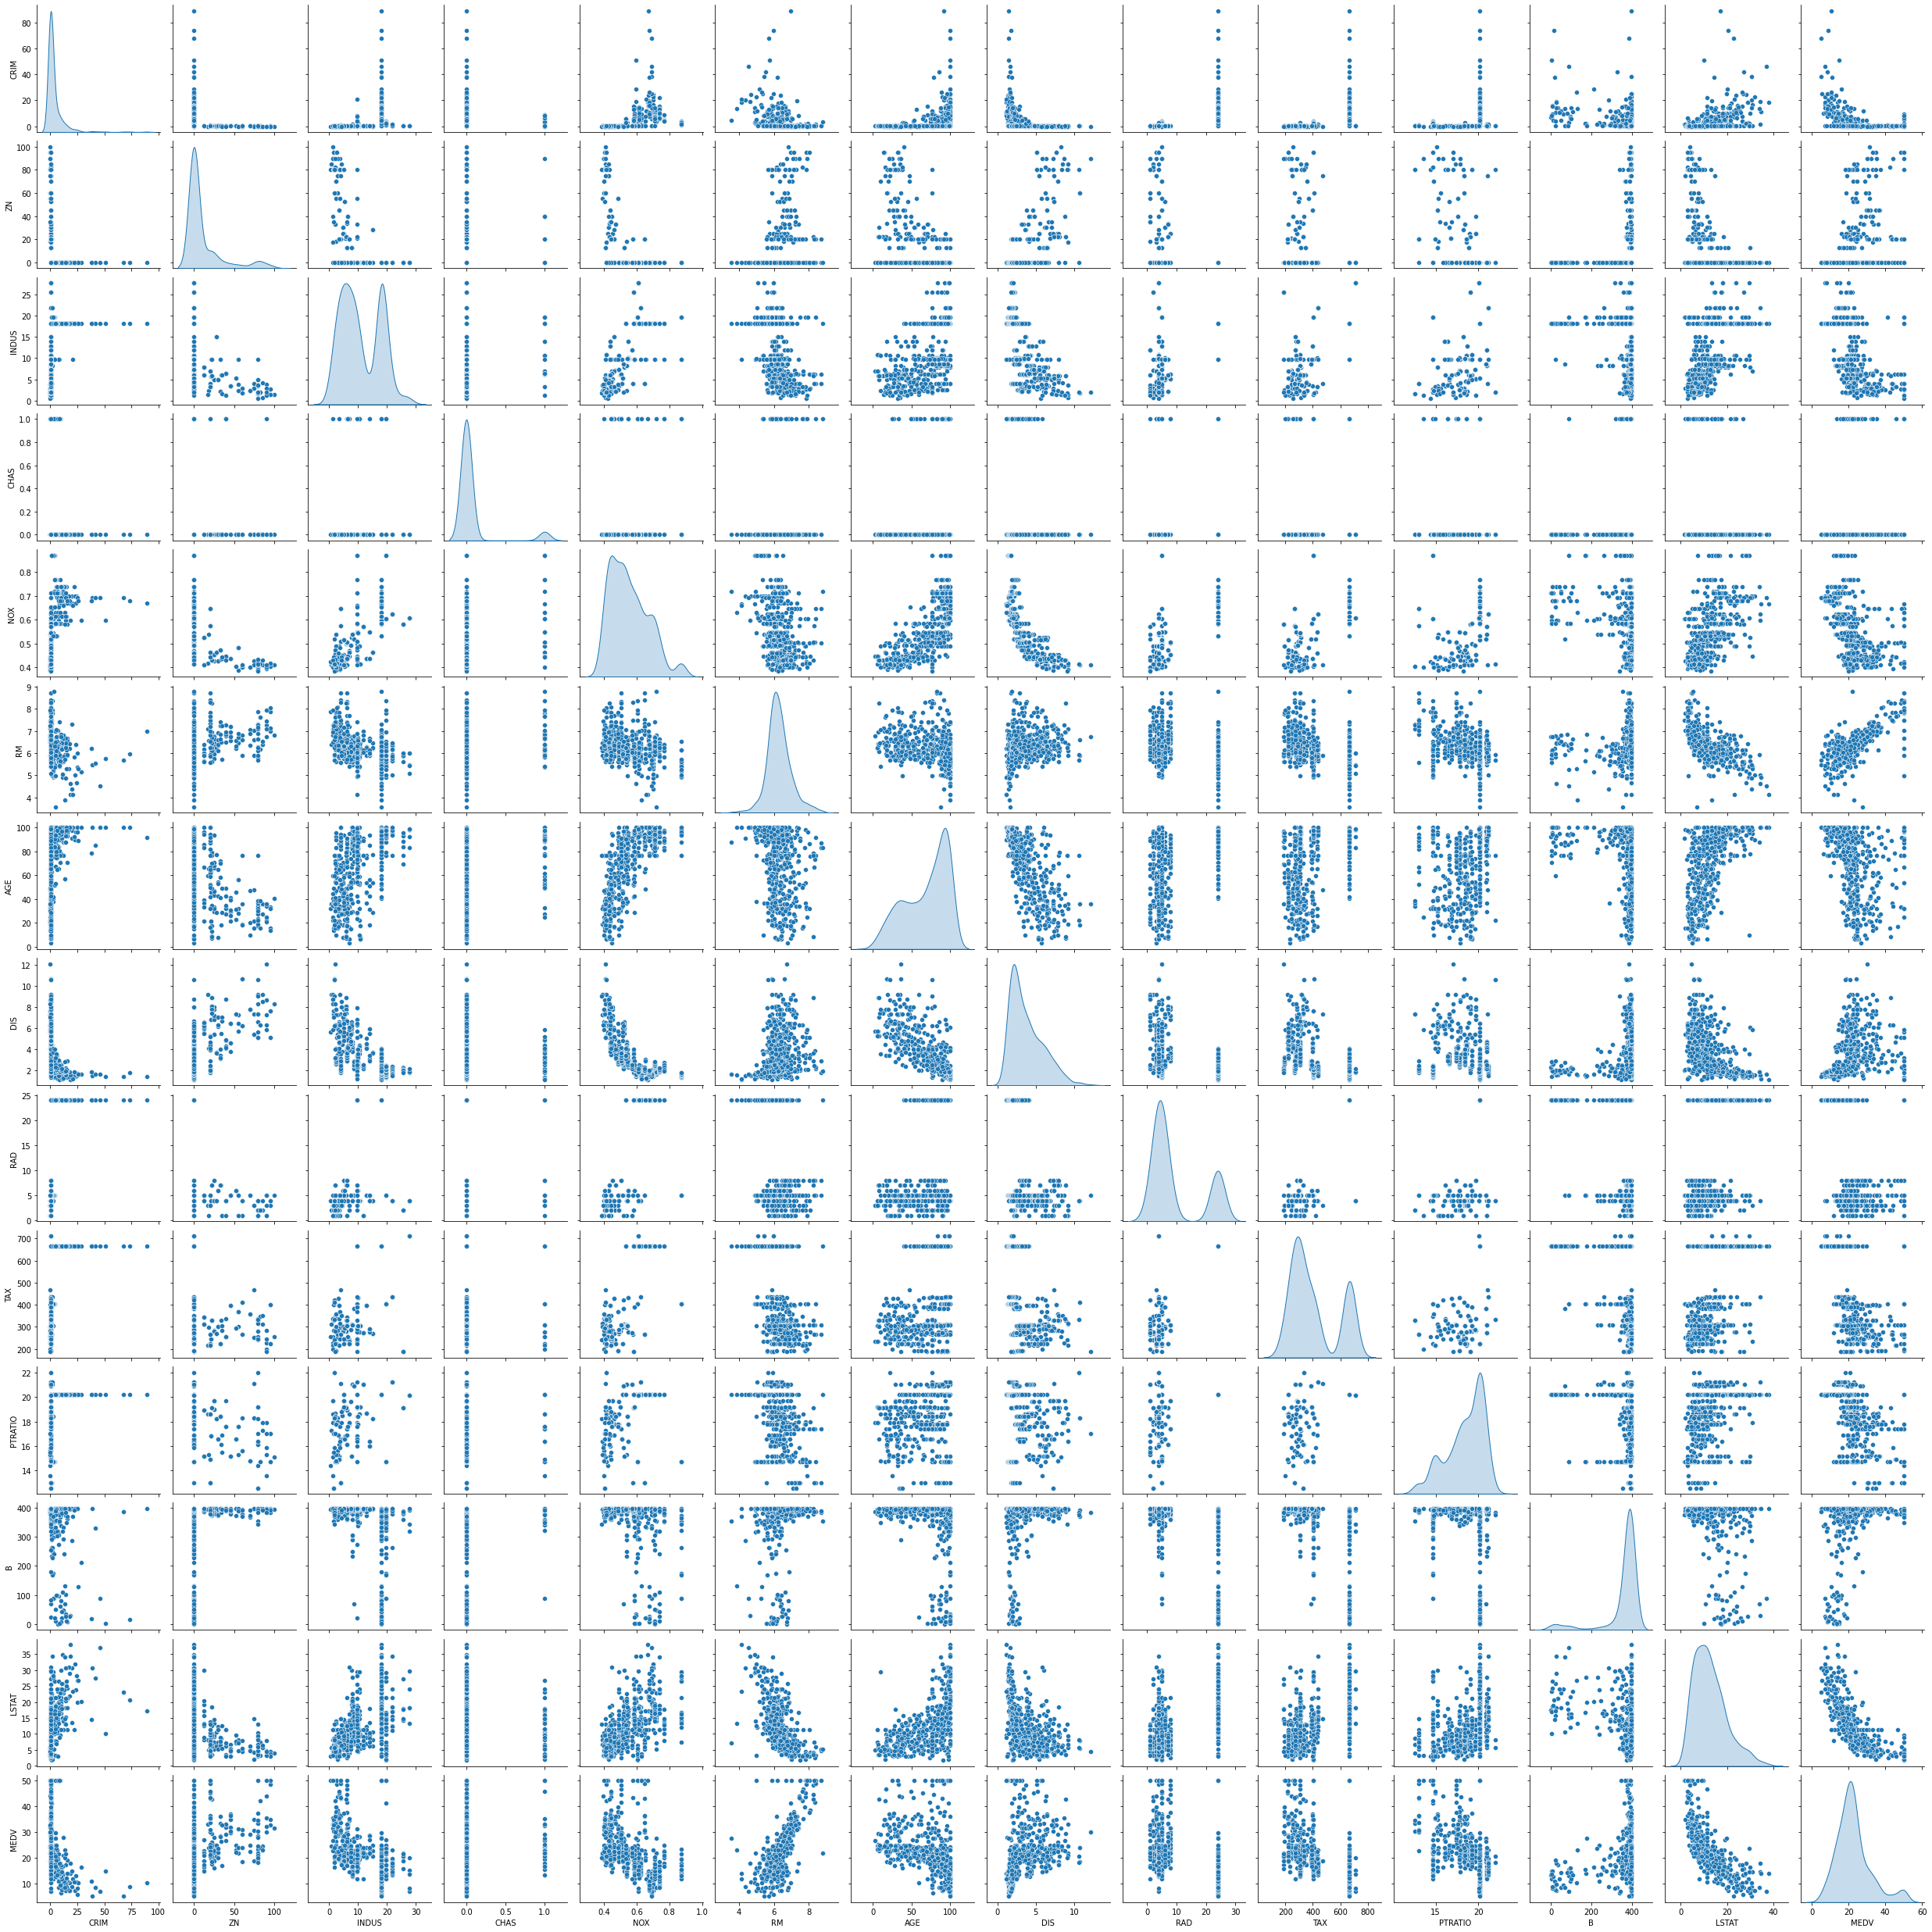

In [33]:

sns.pairplot(data, diag_kind="kde")

In [34]:
#Correlacion entre variables
corr = data.corr()
corr.shape

(14, 14)

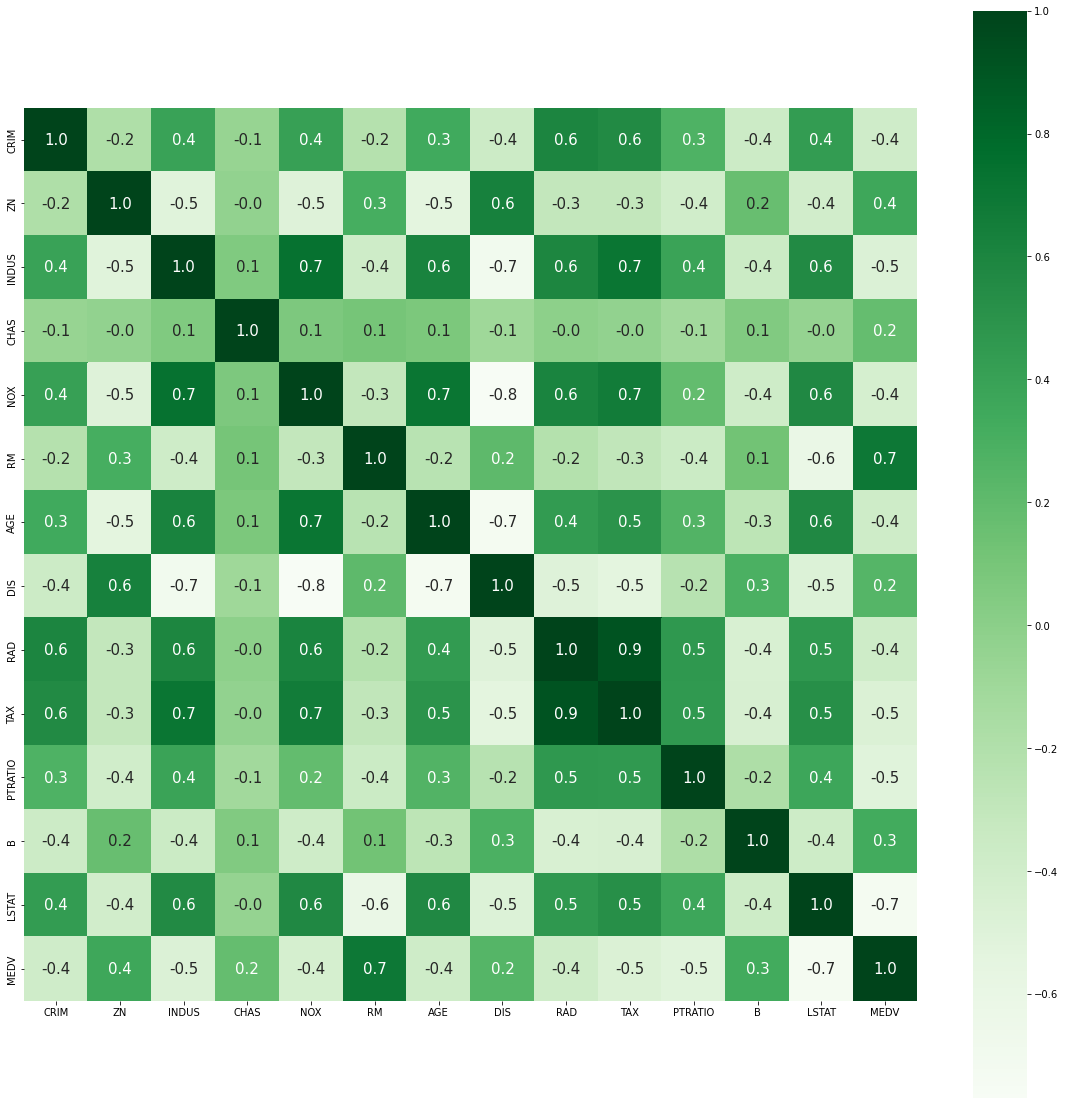

In [35]:
# Grafico el mapa de calor de correlacion entre las variables
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [36]:
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Regresion Lineal

In [37]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [38]:
# Valor de intercepcion
lm.intercept_

34.563187176330956

In [39]:
#Convirtiendo los coeficientes de los valores a un dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.110463
1,ZN,0.045956
2,INDUS,-0.075961
3,CHAS,5.108377
4,NOX,-14.339932
5,RM,3.452014
6,AGE,-0.002355
7,DIS,-1.465877
8,RAD,0.2771
9,TAX,-0.011706


In [40]:
#Prediccion del modelo en el conjunto de entrenamiento
y_pred = lm.predict(X_train)

In [41]:
# Evaluacion del modelo
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7370289314448322
Adjusted R^2: 0.7269741552941934
MAE: 3.137714509817468
MSE: 19.79405050741134
RMSE: 4.44905051751622


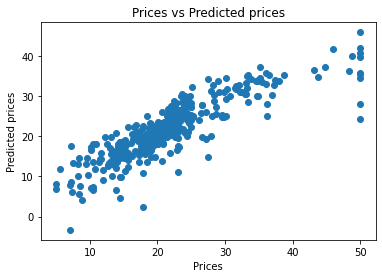

In [42]:
# Visualizando las diferencias entre e precio real y el predicho
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

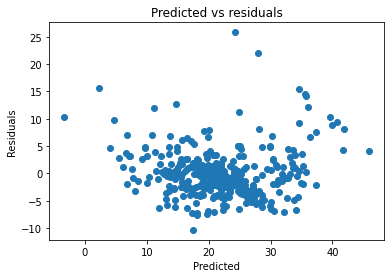

In [43]:
# Verificando residuales
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


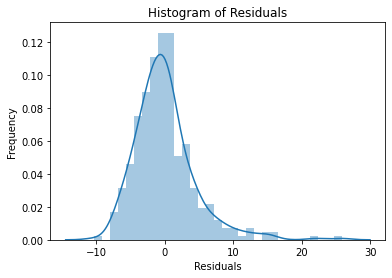

In [44]:
# Verificando errores de normalidad
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [45]:
# Haciendo predicciones con el modelo en el conjunto de prueba
y_test_pred = lm.predict(X_test)

In [46]:
# Evaluando el modelo
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7053893924828623
Adjusted R^2: 0.677636219310958
MAE: 3.874271658853106
MSE: 30.76326093194102
RMSE: 5.546463822287225


# Random Forest 

In [48]:
reg = RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
# Prediccion del modelo en los datos de entrenamiento
y_pred = reg.predict(X_train)

In [50]:
# Evaluacion del modelo
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9770484687846046
Adjusted R^2: 0.9761709102381336
MAE: 0.8848305084745761
MSE: 1.7275807966101686
RMSE: 1.3143746789291737


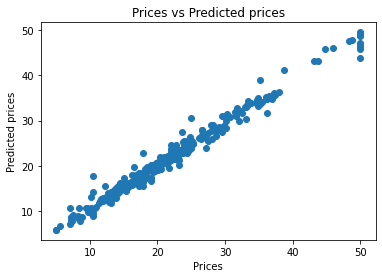

In [51]:
# Visualizando las diferencias entre e precio real y el predicho
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

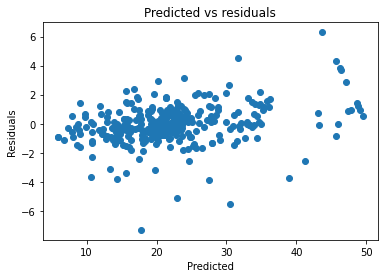

In [52]:
# Verificando residuales
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [53]:
# Haciendo predicciones con el modelo en el conjunto de prueba
y_test_pred = reg.predict(X_test)

In [54]:
# Evaluacion del modelo
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8184582365731188
Adjusted R^2: 0.8013564762502966
MAE: 2.6438355263157884
MSE: 18.956604059210527
RMSE: 4.353918242136676


# XGBoost 


In [56]:
reg = XGBRegressor()

reg.fit(X_train, y_train)

[16:58:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [57]:
# Prediccion del modelo en los datos de entrenamiento
y_pred = reg.predict(X_train)

In [58]:
# Evaluacion del modelo
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9686377737275588
Adjusted R^2: 0.9674386297818478
MAE: 1.1604983553374555
MSE: 2.3606607915932503
RMSE: 1.5364442038659427


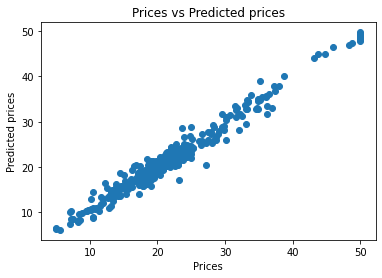

In [59]:
# Visualizando las diferencias entre e precio real y el predicho
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

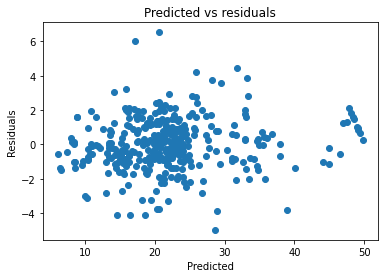

In [60]:
# Verificando residuales
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [61]:
# Haciendo predicciones con el modelo en el conjunto de prueba
y_test_pred = reg.predict(X_test)

In [62]:
# Evaluacion del modelo
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8495827667014
Adjusted R^2: 0.8354130273326913
MAE: 2.5064475486153044
MSE: 15.70657837347661
RMSE: 3.963152580140791


# SVM 

In [65]:
#Creando un conjunto escalado para ser usado en el modelo para mejorar los resultados  
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
reg = svm.SVR()
reg.fit(X_train, y_train)

SVR()

In [67]:
# Prediccion del modelo en los datos de entrenamiento
y_pred = reg.predict(X_train)

In [68]:
# Evaluacion del modelo
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6339677738598694
Adjusted R^2: 0.6199724240368644
MAE: 3.011283715061617
MSE: 27.55154934482078
RMSE: 5.248956976849856


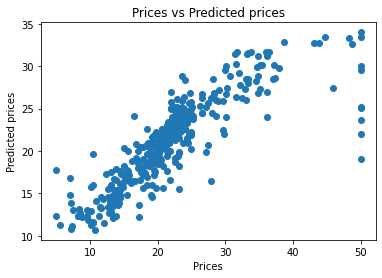

In [69]:
# Visualizando las diferencias entre e precio real y el predicho
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

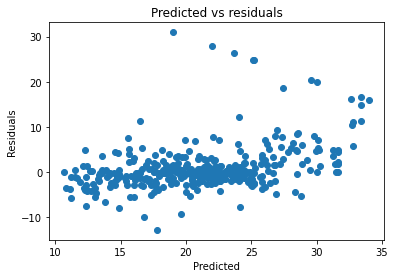

In [70]:
# Verificando residuales
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [71]:
# Haciendo predicciones con el modelo en el conjunto de prueba
y_test_pred = reg.predict(X_test)

In [72]:
# Evaluacion del modelo
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5847633822800591
Adjusted R^2: 0.5456468893064415
MAE: 3.8385328306903044
MSE: 43.35903763638962
RMSE: 6.584757978573672


# Evaluacion y comparacion de los modelos

In [73]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,84.958277
1,Random Forest,81.845824
0,Linear Regression,70.538939
3,Support Vector Machines,58.476338


XGBOOST es el que mejor se comporta en este dataset